### ニューラルネットワークの構築（回帰）
ニューラルネットワーク、すなわち複数のニューロンからなるネットワークを実装します。  
まず、出力が連続的なすうちになる問題、すなわち回帰問題を扱う。

### 実装するニューラルネットワーク
今回は、以下に示す3層のシンプルなニューラルネットワークを実装します。

<img src="../images/nn_regression.png">

このニューラルネットワークは、入力層（ニューロン数 : n=2）、中間層(n=2)、出力層(n=1)の3層構造です。  
中間層の活性化関数はシグモイド関数で、出力層の活性化関数は回帰であるため恒等関数になります。  
  
 ディープラーニングでは近年中間層の活性化関数にReLUを使うことが大いですが、今回は結果を連続的に表示するためにシグモイド関数を使います。  
 このニューラルネットワークに入力を順伝播させて、出力を今回もグリッドで表示します。

### 各層の実装
3層のニューラルネットワークの各層を実装します。  
  
入力層は入力をそのまま受け取る飲みなので省略です。  
中間層は、次のように関数で実装します。

In [ ]:
# 中間層
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u)) # シグモイド関数

この関数は、引数として中間層への入力(`x`)、重み(`w`) とバイアス(`b`)を受け取ります。  
そして、以下の箇所でNumpyのdot関数を用いて行列wとベクトル`x`の行列積を計算し、バイアスを足し合わせます。

In [ ]:
u = np.dot(x, w) + b

(上記の式は以前出てきている)  
このコードは以下に対応する。  

$$  \begin{aligned} \\
\vec{u_j} & = \vec{x_i}W + \vec{b_j} \\
  \end{aligned}
$$ 

得られた`u`を活性化関数であるシグモイド関数に入れて、中間層の出力を得ることができます。  

出力層も、中間層と同様に関数で実装します。

In [ ]:
# 出力層
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u # 恒等関数

引数、及び`u`の計算は中間層と同様です。  
中間層との違いは、活性化関数が恒等関数である点です

重みは、次のようにNumpyの配列を用いた行列として実装します。

In [ ]:
# 重み
w_im = np.array([[4.0, 4.0],
                                [4.0, 4.0]]) # 中間層 2×2の行列
# 一行目 : x1にかけられる
# 二行目 : x2にかけられる

v_mo = np.array([[1.0],[-1.0]]) #出力層 2×1の行列

入力層のニューロン数は2、中間層のニューロン数は2なので、中間層には2×2=4個の重みが必要になります。  
また、中間層のニューロン数は2、出力層のニューロン数は1なので、出力層には2×1=2個の重みが必要になります

バイアスは次のようにベクトルとして実装します。

In [ ]:
# バイアス
b_im = np.array([3.0, -3.0]) #　中間層
b_mo = np.array([0.1]) #　出力層

バイアスの数はニューロンの数に等しいので、中間層には2層、出力層には1個のバイアスが必要になります。  
なお、重みとバイアスの値は適当な値を設定しています。  
  
 以上を踏まえて、順伝播を次のように実装します。

In [ ]:
# 順伝播
inp = np.array([...]) # 入力層
mid = middle_layer(inp, w_im, b_im) #中間層
out = output_layer(mid, w_mo, b_mo) #出力層

入力を重みとバイアスとともに中間層の関数に渡します。  
そして、中間層の出力を重みとバイアスと共に出力層の関数に渡して、出力層の出力をえます。

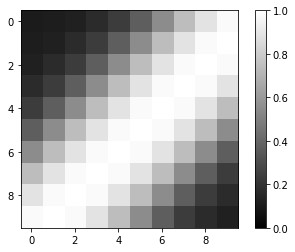

In [13]:
%matplotlib inline
# 全体のコード
import numpy as np
import matplotlib.pyplot as plt

# 中間層
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u)) # シグモイド関数

# 出力層
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u # 恒等関数

# x,y座標
X = np.arange(-1.0, 1.0, 0.2) #　要素数は10個
Y = np.arange(-1.0, 1.0, 0.2)

# 出力を格納する10×10のグリッド
Z = np.zeros((10,10))

# 重み
w_im = np.array([[4.0,4.0],
                                [4.0,4.0]]) # 中間層 2×2の行列
w_mo = np.array([[1.0],
                                 [-1.0]]) # 出力層 2×1の行列

# バイアス
b_im = np.array([3.0, -3.0]) #中間層
b_mo = np.array([0.1]) #出力層

# グリッドの各マスでニューラルネットワークの演算
for i in range(10):
    for j in range(10):
        
        # 順伝播
        inp = np.array([X[i], Y[j]]) #入力層
        mid = middle_layer(inp, w_im, b_im) # 中間層
        out = output_layer(mid, w_mo, b_mo) # 出力層
        
        # グリッドにNNの出力を格納(1×1でもarrayではあるっぽい)
        Z[j][i] = out[0]

# グリッドの表示
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()